In [1]:
pip install omadb  pandas seaborn numpy scipy pyham SPARQLWrapper networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Obtain a list of genes from uniprot.

import urllib.parse
import urllib.request

def unirequest_tab(GOterm):
    #Credit: modified from the uniprot programmatic access page
    url = 'https://www.uniprot.org/uniprot/'
    params = {
    'columns': 'id,entry name,reviewed,protein names,genes,organism,length,database(Bgee)',
    'format': 'tab',
    'query' : 'taxonomy:"Homo sapiens (Human) [9606]" goa:( {} )'.format(GOterm),
    'limit' : 15
    }
    
    data = urllib.parse.urlencode(params)
    
    data = data.encode('utf-8')
    
    req = urllib.request.Request(url, data)
    
    with urllib.request.urlopen(req) as f:
       response = f.read()
    r = response.decode('utf-8')
    return r
#here we pull in our proteins of interest for each biological process

terms = ['canonical Wnt signaling pathway [60070]' ,"TOR signaling [31929]"]#, "BMP signaling pathway [30509]" ]
datasets = { t:unirequest_tab(t) for t in terms}



In [3]:
import pandas as pd
import numpy as np
from io import StringIO

#Load queries into some dataframes

queries =[]

for term in datasets:
    df = pd.read_table(StringIO(datasets[term]))
    df['pathway'] = term
    queries.append(df)

#Total starting dataset
queries = pd.concat(queries)

#in this line we iterate through the dataframe to generate a dictionary of names we will use to identify our proteins at each step of our analysis.
names= { query.Entry:query['Entry name'].split('_')[0]+ ' '+query.pathway for index,query in queries[['Entry','Entry name','pathway']].iterrows() if query['Entry name'] is not np.nan }

/home/cactuskid/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.


In [4]:
queries

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Cross-reference (Bgee),pathway
0,Q5JTC6,AMER1_HUMAN,reviewed,APC membrane recruitment protein 1 (Amer1) (Pr...,AMER1 FAM123B WTX,Homo sapiens (Human),1135,ENSG00000184675;,canonical Wnt signaling pathway [60070]
1,Q96HF1,SFRP2_HUMAN,reviewed,Secreted frizzled-related protein 2 (FRP-2) (s...,SFRP2 FRP2 SARP1 FKSG12 UNQ361/PRO697,Homo sapiens (Human),295,ENSG00000145423;,canonical Wnt signaling pathway [60070]
2,Q15831,STK11_HUMAN,reviewed,Serine/threonine-protein kinase STK11 (EC 2.7....,STK11 LKB1 PJS,Homo sapiens (Human),433,ENSG00000118046;,canonical Wnt signaling pathway [60070]
3,Q6P3W7,SCYL2_HUMAN,reviewed,SCY1-like protein 2 (Coated vesicle-associated...,SCYL2 CVAK104 KIAA1360,Homo sapiens (Human),929,ENSG00000136021;,canonical Wnt signaling pathway [60070]
4,P18827,SDC1_HUMAN,reviewed,Syndecan-1 (SYND1) (CD antigen CD138),SDC1 SDC,Homo sapiens (Human),310,ENSG00000115884;,canonical Wnt signaling pathway [60070]
5,Q8N474,SFRP1_HUMAN,reviewed,Secreted frizzled-related protein 1 (FRP-1) (s...,SFRP1 FRP FRP1 SARP2,Homo sapiens (Human),314,ENSG00000104332;,canonical Wnt signaling pathway [60070]
6,Q6FHJ7,SFRP4_HUMAN,reviewed,Secreted frizzled-related protein 4 (sFRP-4) (...,SFRP4 FRPHE,Homo sapiens (Human),346,ENSG00000106483;,canonical Wnt signaling pathway [60070]
7,O75030,MITF_HUMAN,reviewed,Microphthalmia-associated transcription factor...,MITF BHLHE32,Homo sapiens (Human),526,ENSG00000187098;,canonical Wnt signaling pathway [60070]
8,Q9H237,PORCN_HUMAN,reviewed,Protein-serine O-palmitoleoyltransferase porcu...,PORCN MG61 PORC PPN,Homo sapiens (Human),461,ENSG00000102312;,canonical Wnt signaling pathway [60070]
9,O95980,RECK_HUMAN,reviewed,Reversion-inducing cysteine-rich protein with ...,RECK ST15,Homo sapiens (Human),971,ENSG00000122707;,canonical Wnt signaling pathway [60070]


In [5]:
from omadb import Client
c = Client()
omadata = {}
#retrieve oma entries for all query genes
for query in list(queries['Entry']) :    
    try:
        omadata[query] = c.entries.__getitem__(query) 
    except:
        print('err ' +query)

In [6]:
#Take all queries from human and
#get orthologs in all of the species they're found in
orthologs = {}
for query in omadata:
    orthologs[query] = c.entries.orthologs(omadata[query]['omaid'])

In [8]:
#Create profiles from orthology data, with species codes as columns

#obtain all species codes for query genes
profiles = {}
for query in orthologs:
    profiles[query] = {}
    profiles[query]['name'] = names[query]
    for ortho in orthologs[query]:
        spec = ortho['omaid'][0:5]
        if spec not in profiles[query]:
            profiles[query][spec] = 1
        else:
            profiles[query][spec]+=1

#The columns of the matrix are the union of all the species represented across all orthologs


columns = set([ spec  for query in profiles for spec in profiles[query] ])

#Add in 0s where the orthologs are absent

for query in profiles:
    profiles[query].update( { spec : 0 for spec in columns if spec not in profiles[query] } )

#Create a dataframe with this dictionary

orthosdf = pd.DataFrame.from_dict( profiles , orient = 'index')
orthosdf.index = orthosdf.name
orthosdf = orthosdf.drop('name', axis = 1)


In [9]:
orthosdf.head()

,STRR1,CHLAD,CHLSY,CHLAA,PLAFR,SAICN,PYROM,CONA1,SPHMS,BOTFB,...,FRACC,METEP,SCHMD,MODMB,USTMA,FOMPI,DANPL,SCHOY,LEPMJ,MYCMM
name,,,,,,,,,,,,,,,,,,,,,
BCL9 canonical Wnt signaling pathway [60070],1,1,1,1,1,1,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
APC canonical Wnt signaling pathway [60070],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BCL9L canonical Wnt signaling pathway [60070],0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
DVL1 canonical Wnt signaling pathway [60070],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
AMER1 canonical Wnt signaling pathway [60070],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Use seaborn to visualize the clustering of functional modules

import seaborn as sns
from matplotlib import pyplot as plt

#Metrics used to compare the vectors to establish a distance kernel
metrics = [ 'euclidean', 'hamming', 'jaccard' ]

#Hierarchical clustering methods

methods = [ 'average' , 'weighted' , 'centroid']

#Visualize the clustered profile matrix
sns.clustermap( orthosdf.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = orthosdf.columns , figsize = (10, 100))


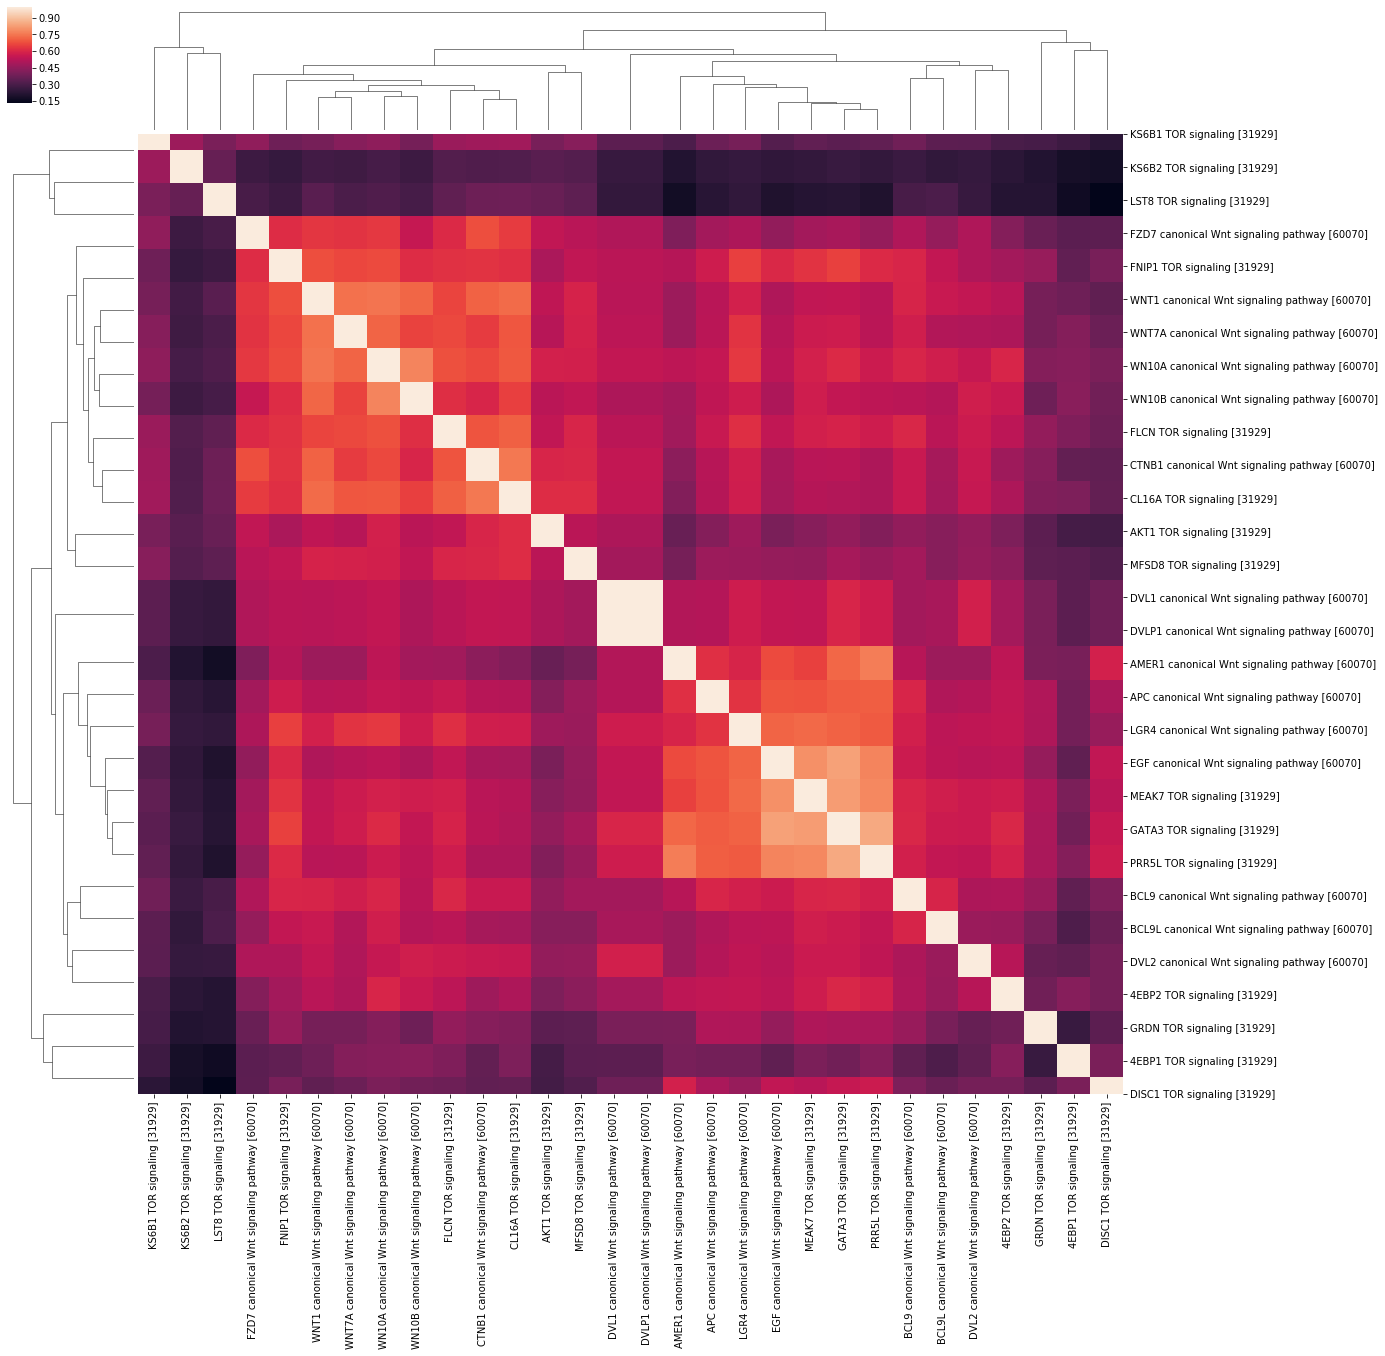

In [11]:
#here we directly establish the distance matrix between all profiles
from scipy.spatial.distance import cdist

#let's generate a distance kernel with a distance metric of our choice
distmat = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = orthosdf.index , xticklabels = orthosdf.index , figsize = (20, 20))


In [12]:
#let's use independent analysis to comfirm 
#we need the BGee cross reference for our human genes human
qlist = { query.Entry:query['Cross-reference (Bgee)'].replace(';','') for index,query in queries[['Entry','Cross-reference (Bgee)']].iterrows() if query['Cross-reference (Bgee)'] is not np.nan }
qlists = {'HUMAN': qlist }

# now using some cross references to other organisms
xrefs = {}
#we're going to grab the ensemble IDs for the orthologues from a few species also present in the Bgee dataset
#Bgee species are listed here https://bgee.org
#species information for OMA is available at https://omabrowser.org/All/oma-species.txt
#Ive selected some interesting species that are in both
species = [ 'DROME','CAEEL' , 'DANRE' , 'MOUSE' , 'PIGXX']
#... my cat would never forgive me if I didn't include them in the analysis
species +=['FELCA']

#retrieve the uniprot xrefs for each of the sequences
allnames = {}
for q in orthologs:
    for o in orthologs[q]:
        for spec in species:
            if spec not in xrefs:
                xrefs[spec] = {}
            if  o['omaid'][0:5] == spec:
                xrefs[spec][o['omaid'] ] = c.entries.xrefs(o['omaid'])
                if 'UniProtKB/TrEMBL' in xrefs[spec][o['omaid'] ]:
                    names[ xrefs[spec][o['omaid']]['UniProtKB/TrEMBL'][0]] = names[q]
allnames.update(names)


In [13]:
#if we have the 'Ensembl Gene' and 'UniProtKB/TrEMBL' for a gene we can add the genes to a list
#like we did for human.
import urllib.parse
import urllib.request
def unirequest(ID):
    #credit: uniprot programmatic access page
    url = 'https://www.uniprot.org/uploadlists/'
    params = {
    'from': 'ID',
    'to': 'ENSEMBLGENOME_ID',
    'format': 'tab',
    'query': ID
    }
    data = urllib.parse.urlencode(params)
    data = data.encode('utf-8')
    req = urllib.request.Request(url, data)
    with urllib.request.urlopen(req) as f:
       response = f.read()
    r = response.decode('utf-8')
    return {r.split()[2]:r.split()[3]}

for spec in species:
    #map everything to ensembl gene IDs
    qlist = {}
    for entry in xrefs[spec]:
        if 'Ensembl Gene' in xrefs[spec][entry]  and 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            try:
                qlist.update({xrefs[spec][entry]['UniProtKB/TrEMBL'][0] : xrefs[spec][entry]['Ensembl Gene'][0].split('.')[0] })
            except IndexError:
                pass
        elif 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            try:
                #if we don't have the ensemble ID in OMA
                #we can still try and pull it from uniprot
                qlist.update(unirequest(xrefs[spec][entry]['UniProtKB/TrEMBL'][0]))
            except TypeError:
                pass
            except IndexError:
                pass
    qlists.update({spec:qlist})


In [14]:
#Retrieving tissue specific expression for each of our genes using
#a sparql query for using lists of ensemble IDs on BGEE
from SPARQLWrapper import SPARQLWrapper , CSV
from io import StringIO

endpt = "http://biosoda.expasy.org:8080/rdf4j-server/repositories/bgeelight"
sparql = SPARQLWrapper(endpt)

#here's the template sparql query we're going to be using
#we can add our gene IDs for each species

query = '''
PREFIX orth: <http://purl.org/net/orth#>
PREFIX genex: <http://purl.org/genex#>
PREFIX obo: <http://purl.obolibrary.org/obo/>
PREFIX lscr: <http://purl.org/lscr#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT distinct ?anat ?anatName ?geneEns{{
    values ?geneEns {{   {0}   }}
	?gene genex:isExpressedIn ?anat .
    ?gene lscr:xrefEnsemblGene ?geneEns.
	?gene rdfs:label ?geneName .
	?anat rdfs:label ?anatName .
}} 
'''

dfs = []
for species in qlists:
    #for each species in our queries
    pre = '<http://rdf.ebi.ac.uk/resource/ensembl/'
    suf = '>'
    #make a list of gene IDs
    ensemblelist = ''.join( [ pre + qlists[species][uniID]  + suf + ' ' for uniID in qlists[species] ] )
    #get the Bgee data
    sparql.setQuery(query.format(ensemblelist))
    sparql.setReturnFormat(CSV)
    results = sparql.query().convert()
    #and make a dataframe for our returned results
    sub = pd.read_csv(StringIO(results.decode()) )
    #add which species the data came from to our dataframe columns
    sub['species'] = species
    sub['geneEns'] = sub['geneEns'].map(lambda x : x.split('/')[-1])
    
    #add the uniprot cannonical IDs into our dataframe as well
    sub['canonicalid'] = sub['geneEns'].map(dict(zip( qlists[species].values(), qlists[species].keys() )))
    #use uniprot IDs to map back to our original human gene names 
    sub['names'] =  sub['canonicalid'].map(names)
    dfs.append(sub)


#put everything into one big dataframe
expressionDF = pd.concat(dfs)


HUMAN
                        anatName  \
0                mammalian vulva   
1         medial globus pallidus   
2                   hypothalamus   
3  right atrium auricular region   
4              cardiac ventricle   

                                            anat          geneEns species  \
0  http://purl.obolibrary.org/obo/UBERON_0000997  ENSG00000164073   HUMAN   
1  http://purl.obolibrary.org/obo/UBERON_0002477  ENSG00000140950   HUMAN   
2  http://purl.obolibrary.org/obo/UBERON_0001898  ENSG00000155760   HUMAN   
3  http://purl.obolibrary.org/obo/UBERON_0006631  ENSG00000205213   HUMAN   
4  http://purl.obolibrary.org/obo/UBERON_0002082  ENSG00000205213   HUMAN   

  canonicalid                                         names  
0      Q8NHS3                   MFSD8 TOR signaling [31929]  
1      Q6P9B6                   MEAK7 TOR signaling [31929]  
2      O75084  FZD7 canonical Wnt signaling pathway [60070]  
3      Q9BXB1  LGR4 canonical Wnt signaling pathway [60070]  
4   

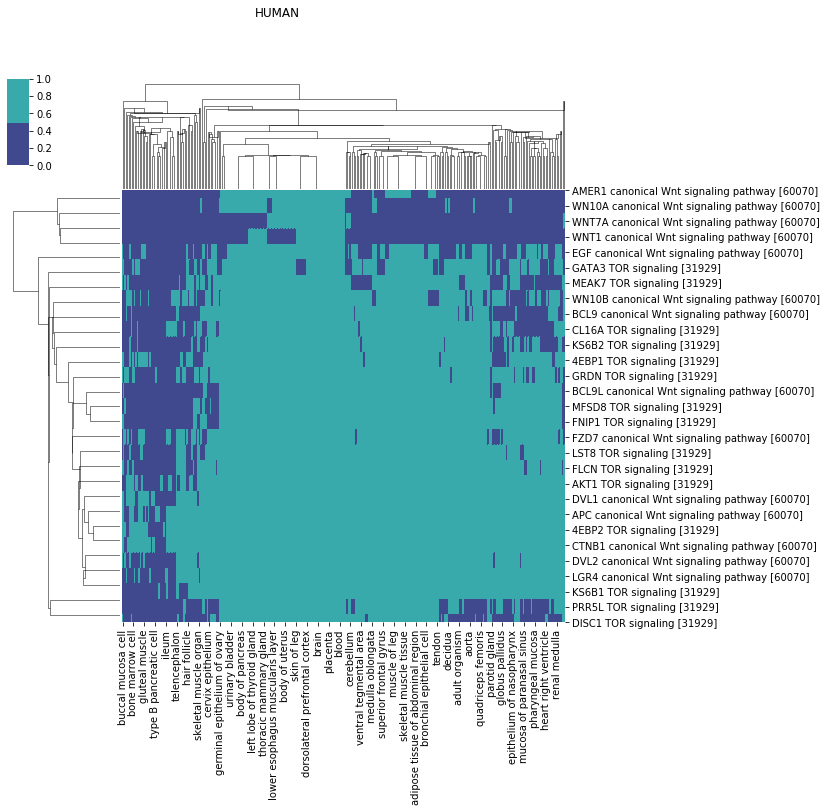

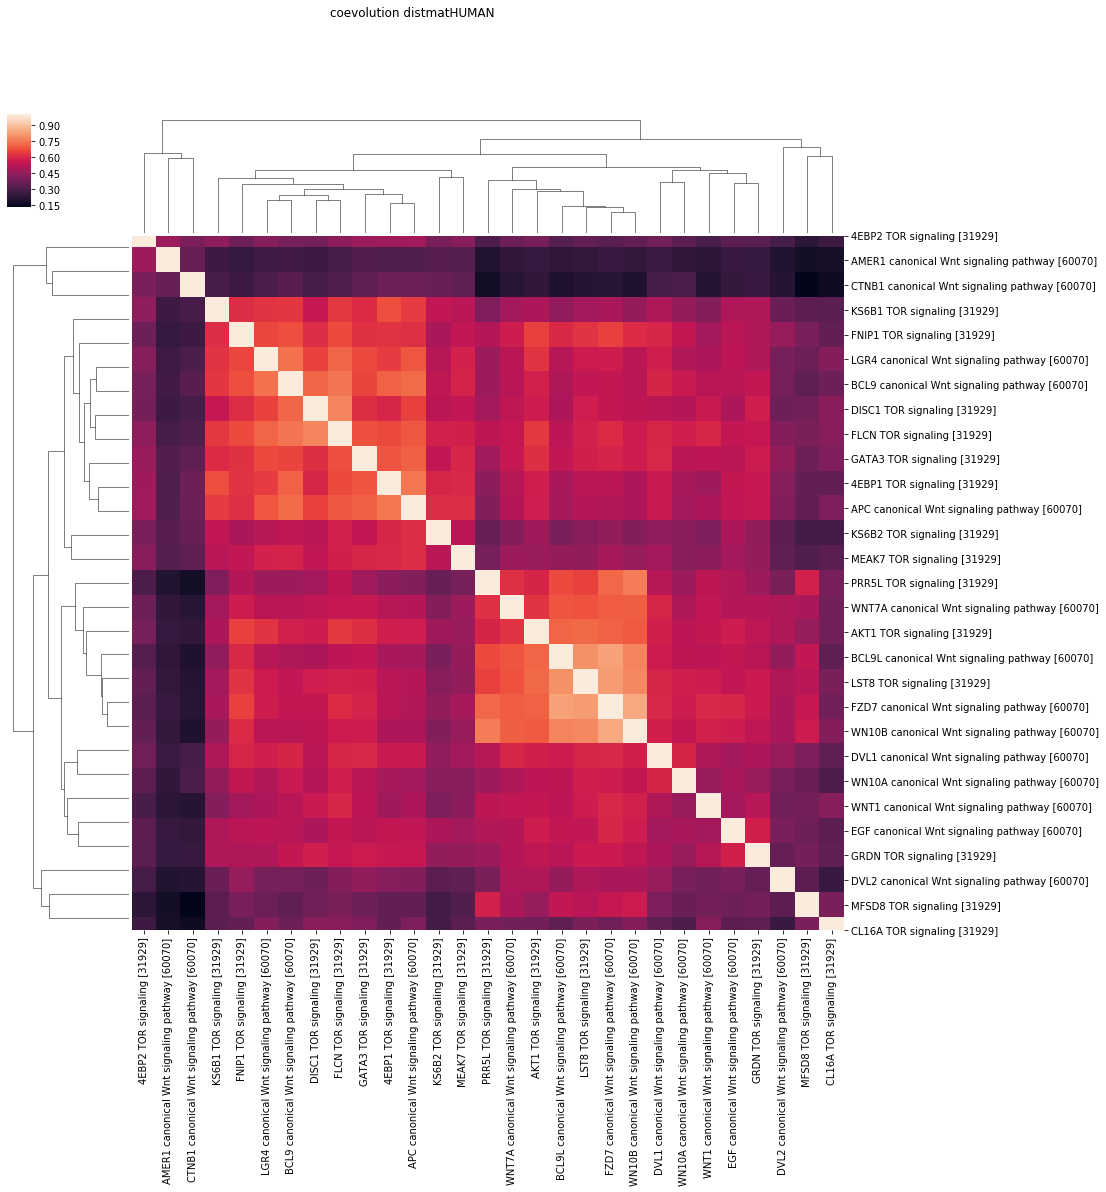

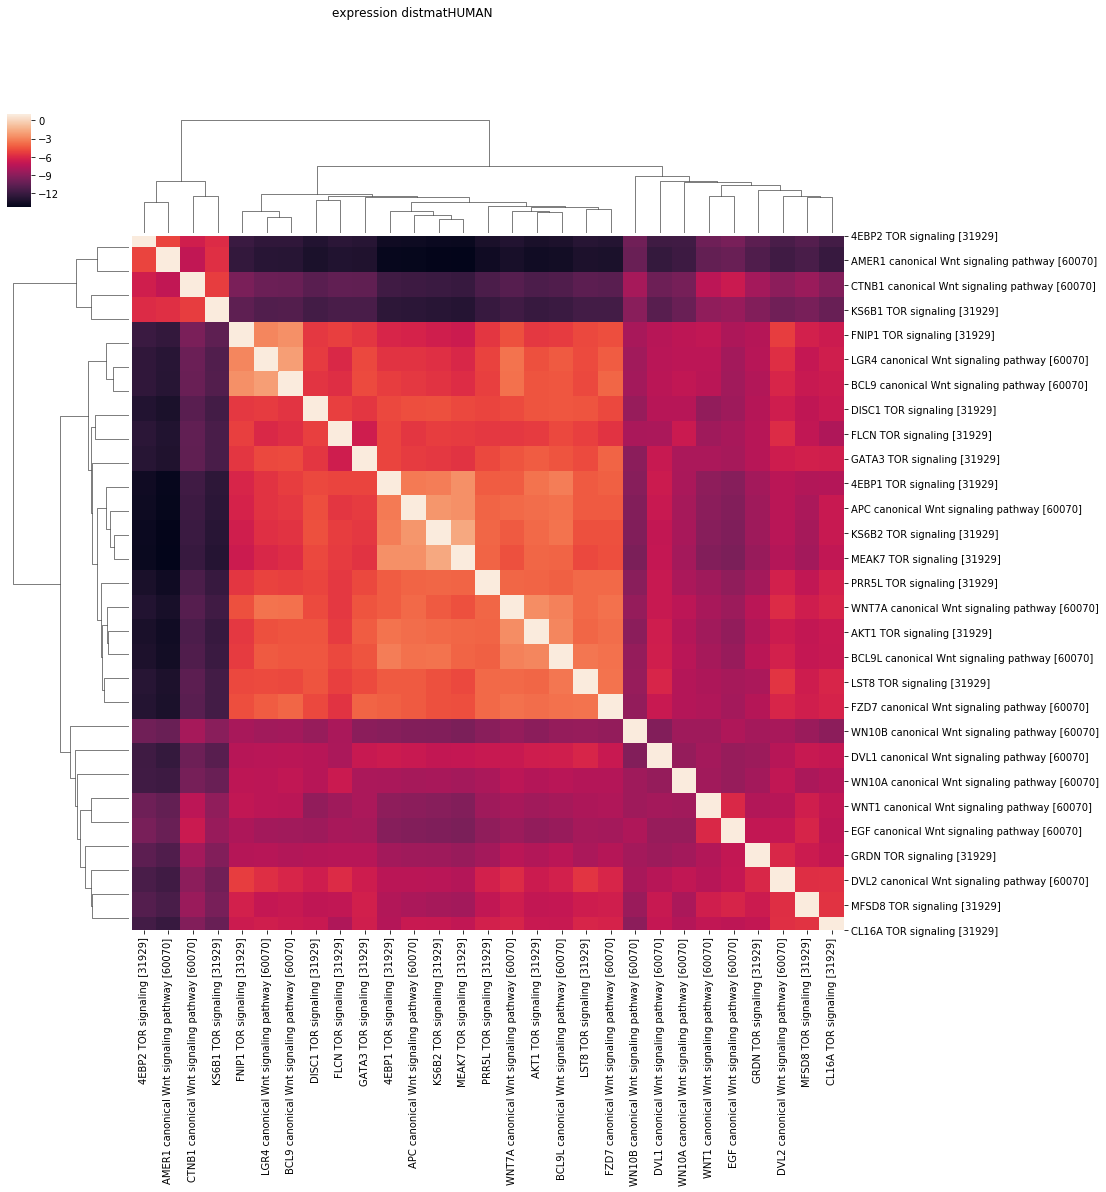

 do our matrices match from one approach to the other? 


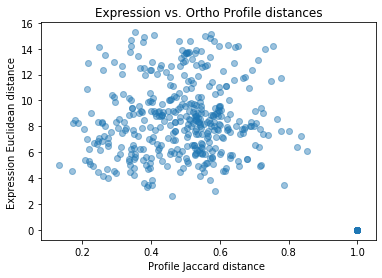

Pearson:(0.22799098155373831, 2.2285294803944656e-11)
DROME
                         anatName  \
0                           brain   
1           eye disc (Drosophila)   
2           eye disc (Drosophila)   
3         multi-cellular organism   
4  visual primordium (Drosophila)   

                                            anat      geneEns species  \
0  http://purl.obolibrary.org/obo/UBERON_0000955  FBgn0264691   DROME   
1   http://purl.obolibrary.org/obo/FBbt_00001768  FBgn0000499   DROME   
2   http://purl.obolibrary.org/obo/FBbt_00001768  FBgn0264691   DROME   
3  http://purl.obolibrary.org/obo/UBERON_0000468  FBgn0035767   DROME   
4   http://purl.obolibrary.org/obo/FBbt_00001059  FBgn0261560   DROME   

  canonicalid                                         names  
0      B4F5L6                    LST8 TOR signaling [31929]  
1      P51140  DVL2 canonical Wnt signaling pathway [60070]  
2      B4F5L6                    LST8 TOR signaling [31929]  
3      Q9VS51                 

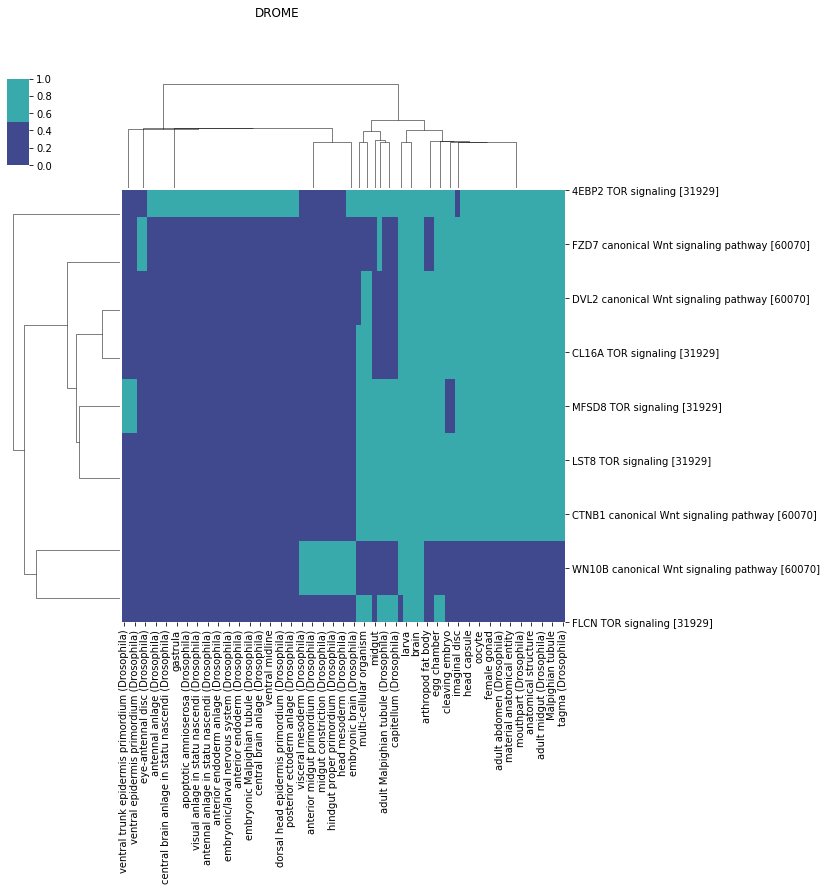

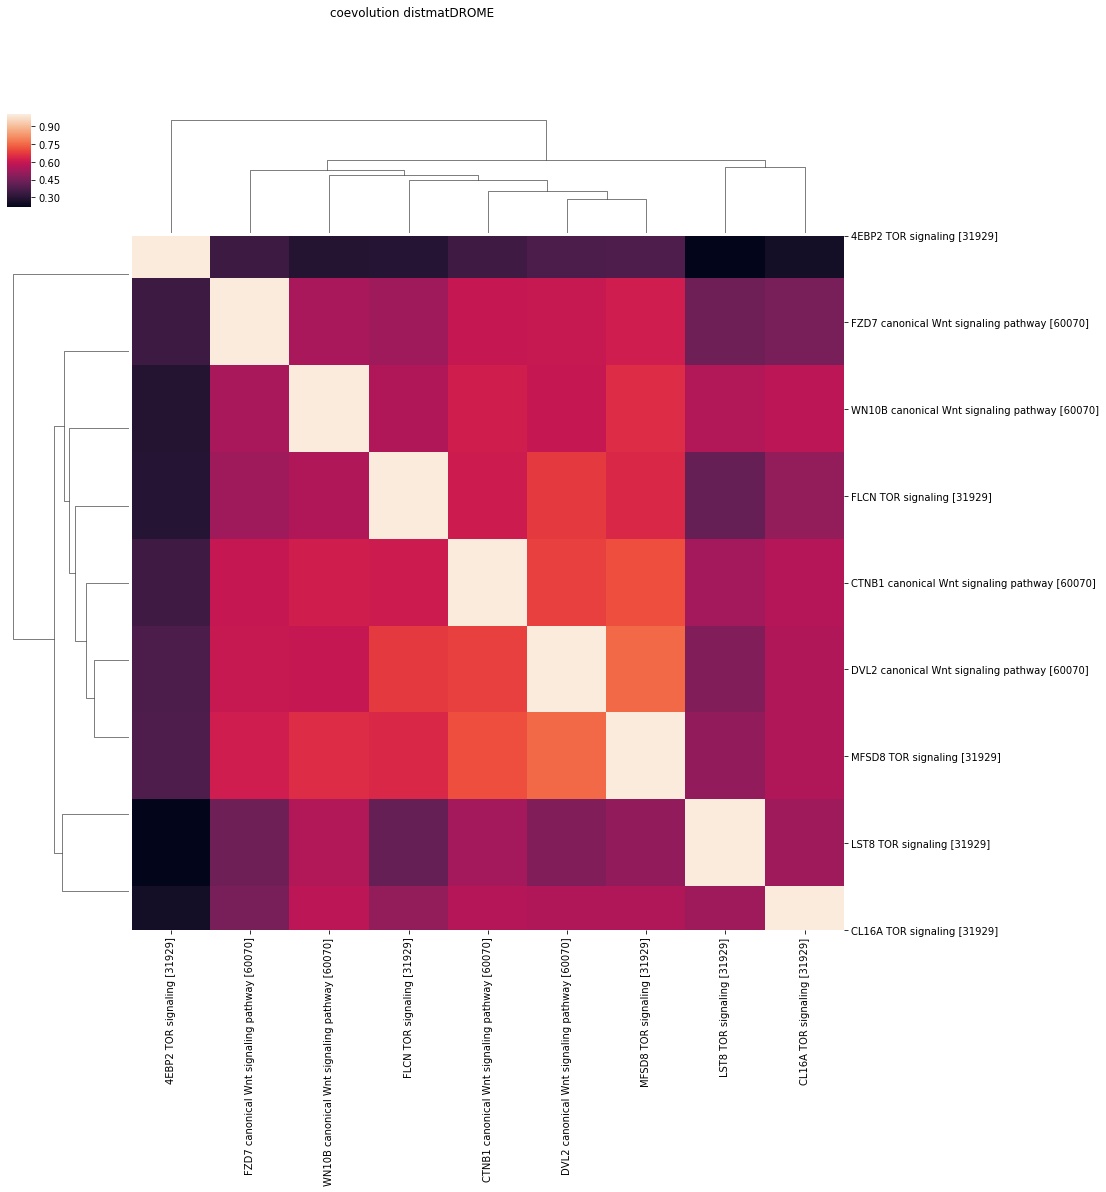

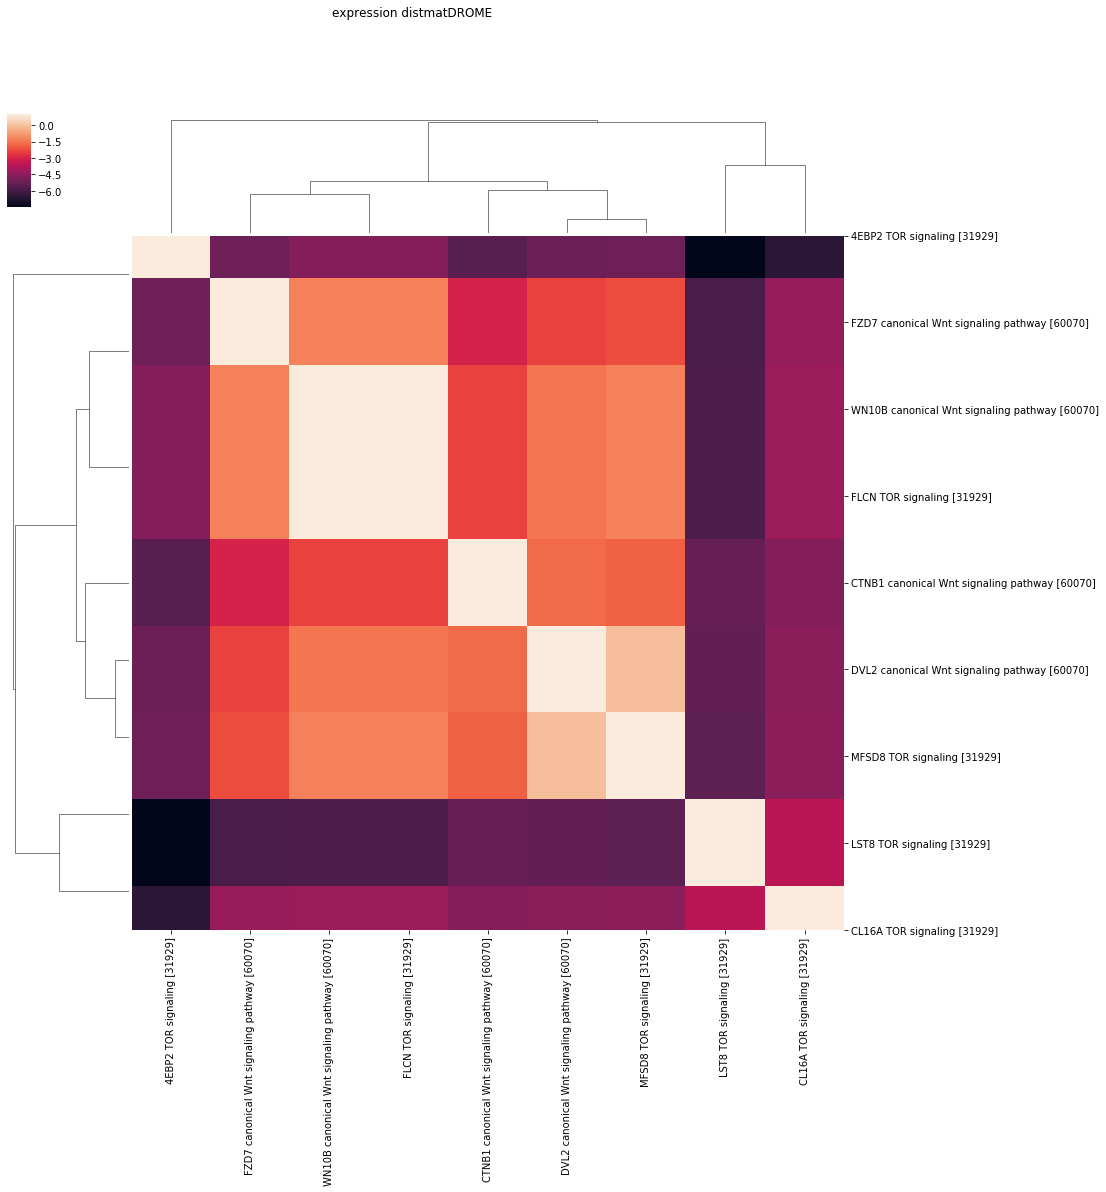

 do our matrices match from one approach to the other? 


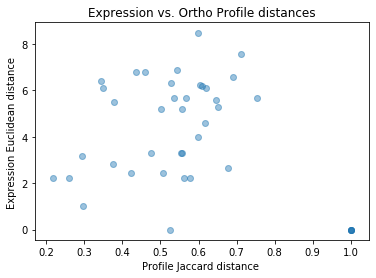

Pearson:(0.28557638464832924, 0.009757772023080272)
CAEEL
                             anatName  \
0                      adult organism   
1             multi-cellular organism   
2                      adult organism   
3                               gonad   
4  pharyngeal muscle cell (C elegans)   

                                            anat         geneEns species  \
0  http://purl.obolibrary.org/obo/UBERON_0007023  WBGene00003397   CAEEL   
1  http://purl.obolibrary.org/obo/UBERON_0000468  WBGene00001979   CAEEL   
2  http://purl.obolibrary.org/obo/UBERON_0007023  WBGene00001660   CAEEL   
3  http://purl.obolibrary.org/obo/UBERON_0000991  WBGene00003397   CAEEL   
4    http://purl.obolibrary.org/obo/WBbt_0005451  WBGene00003397   CAEEL   

  canonicalid                                          names  
0  A0A0K3AWM6   FZD7 canonical Wnt signaling pathway [60070]  
1      H2L2I2  CTNB1 canonical Wnt signaling pathway [60070]  
2      P46578                    CL16A TOR signal

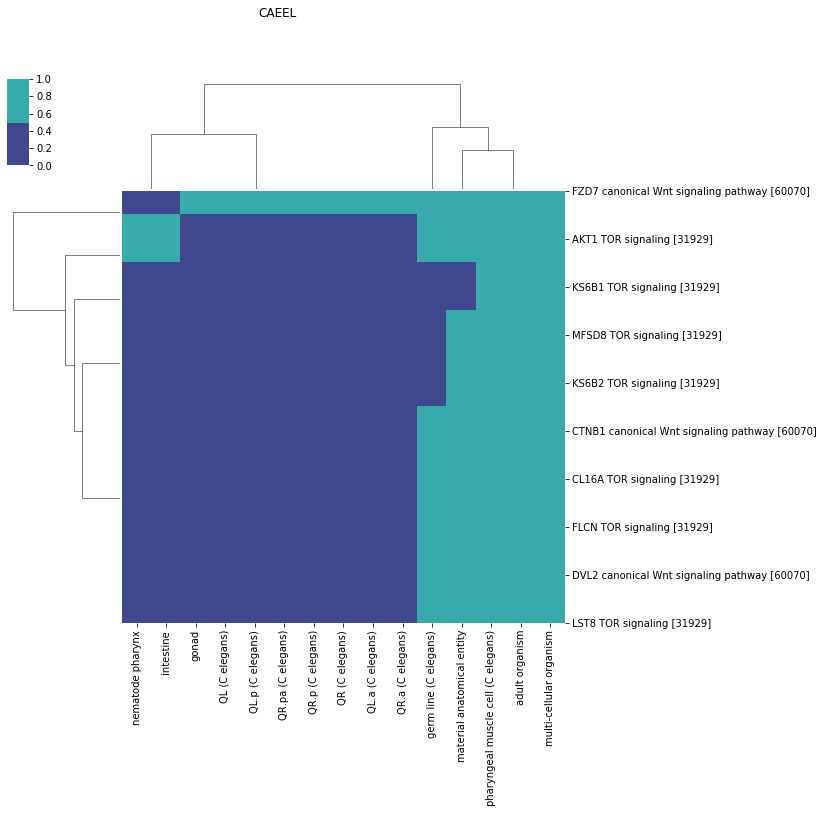

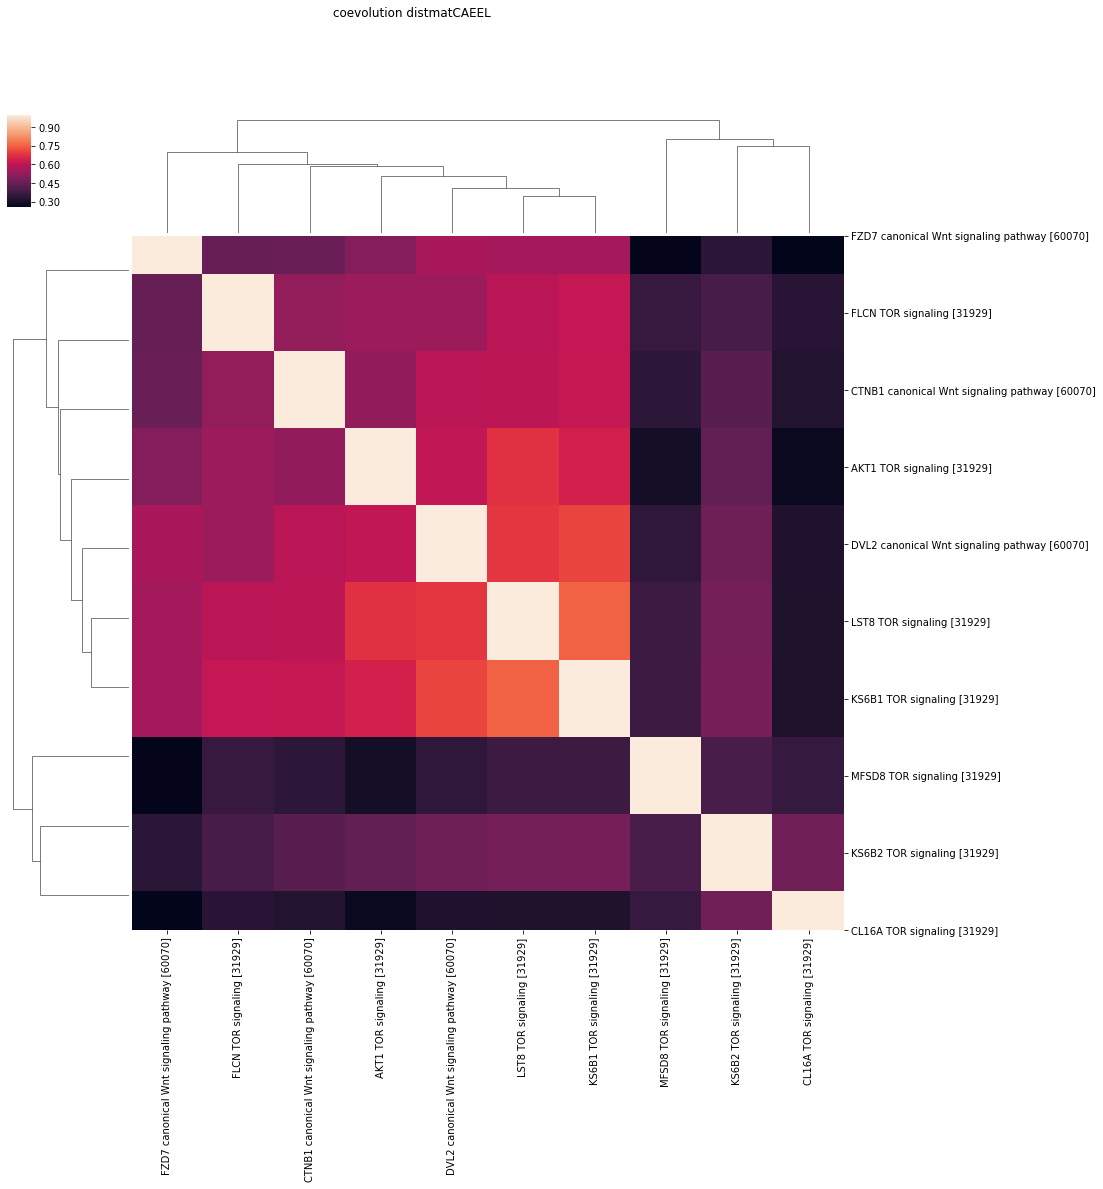

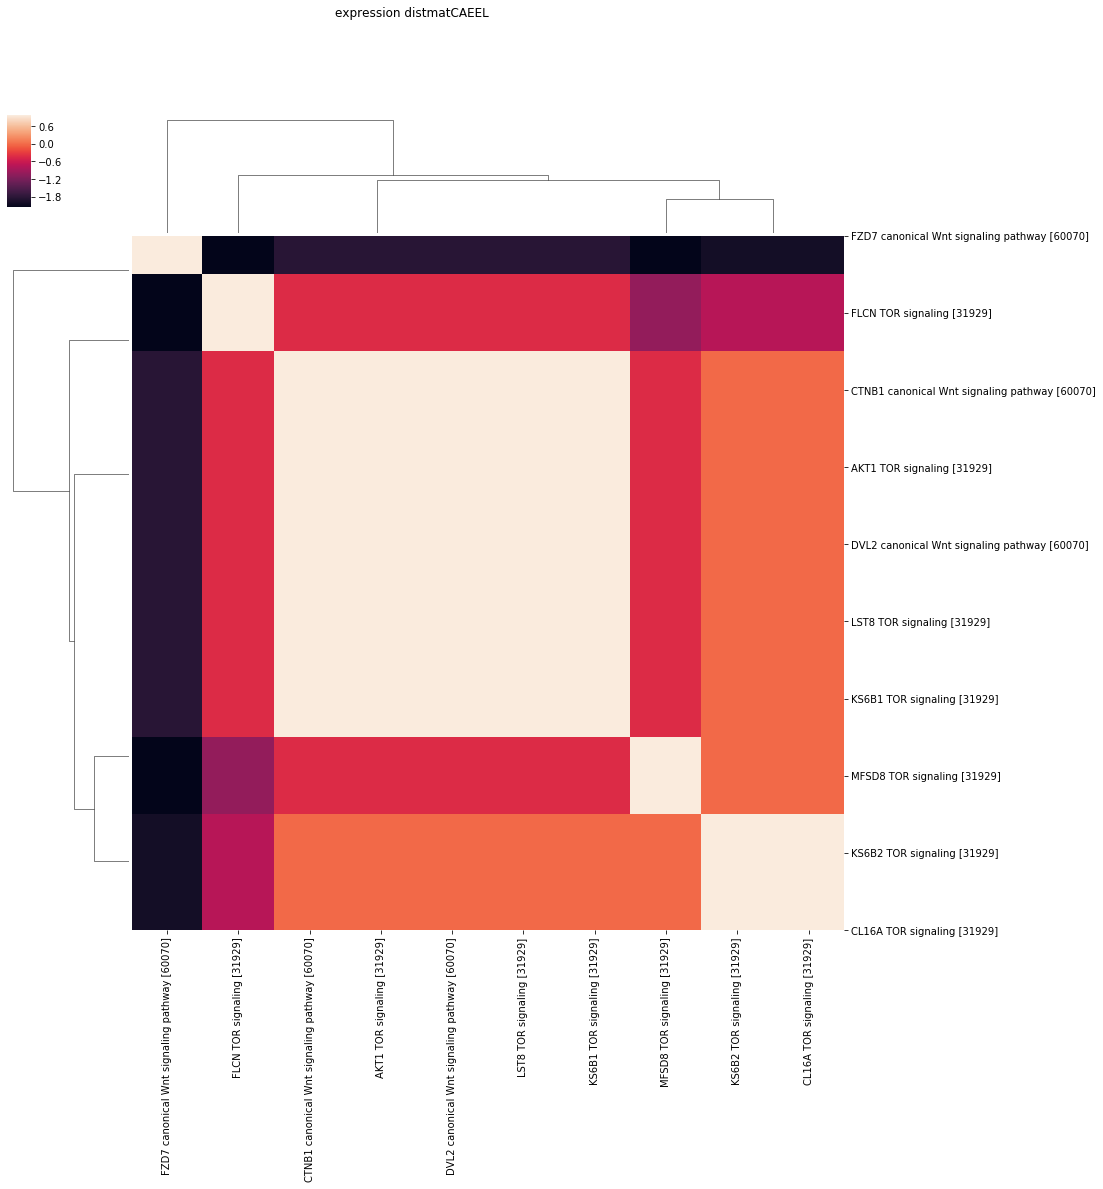

 do our matrices match from one approach to the other? 


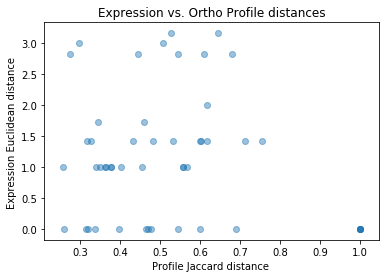

Pearson:(0.17890779586382094, 0.07491512377039285)
DANRE
          anatName                                           anat  \
0            larva  http://purl.obolibrary.org/obo/UBERON_0002548   
1  pharyngeal arch  http://purl.obolibrary.org/obo/UBERON_0002539   
2            heart  http://purl.obolibrary.org/obo/UBERON_0000948   
3             vein  http://purl.obolibrary.org/obo/UBERON_0001638   
4  cleaving embryo  http://purl.obolibrary.org/obo/UBERON_0007010   

              geneEns species canonicalid  \
0  ENSDARG00000062385   DANRE      E9QIZ9   
1  ENSDARG00000027589   DANRE      Q8QFM3   
2  ENSDARG00000058868   DANRE      F8W4Z3   
3  ENSDARG00000027589   DANRE      Q8QFM3   
4  ENSDARG00000003167   DANRE  A0A0R4IPN3   

                                          names  
0                    FLCN TOR signaling [31929]  
1  FZD7 canonical Wnt signaling pathway [60070]  
2   APC canonical Wnt signaling pathway [60070]  
3  FZD7 canonical Wnt signaling pathway [60070]  
4      

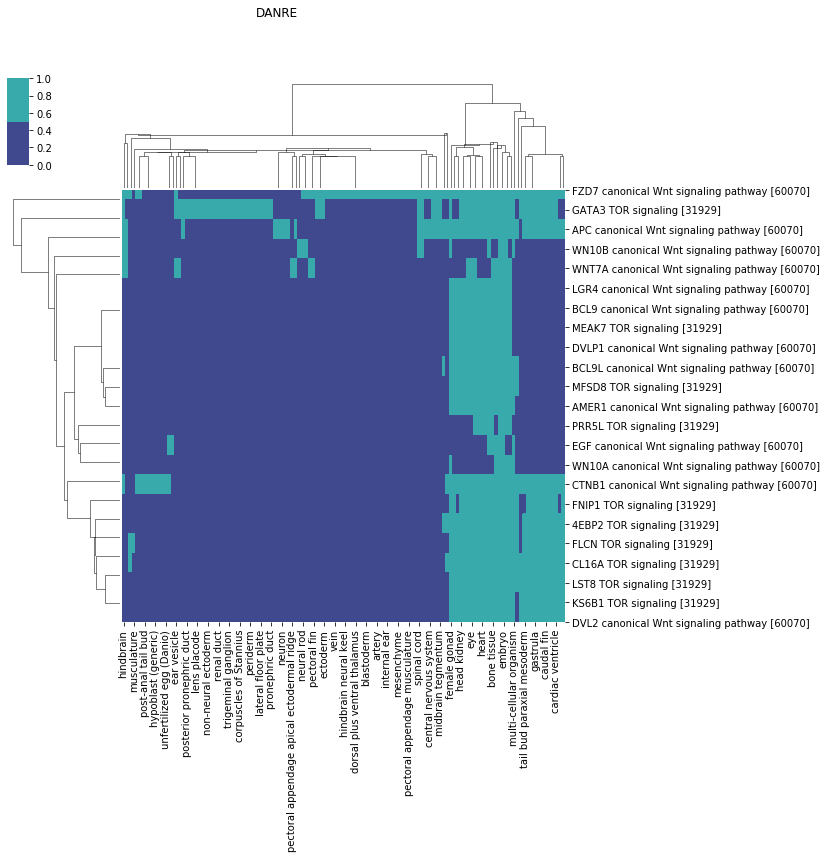

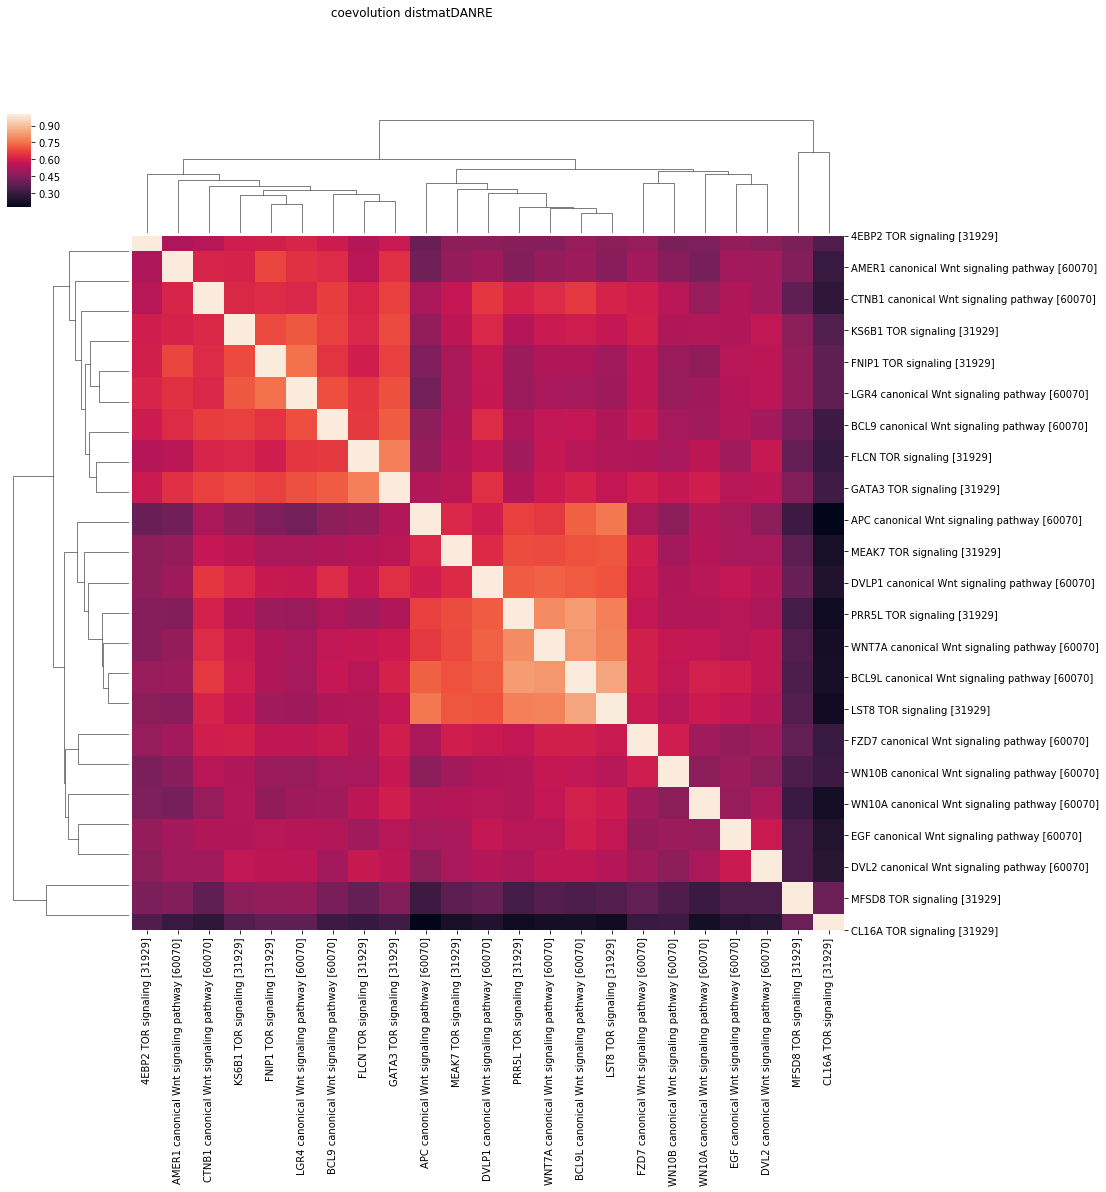

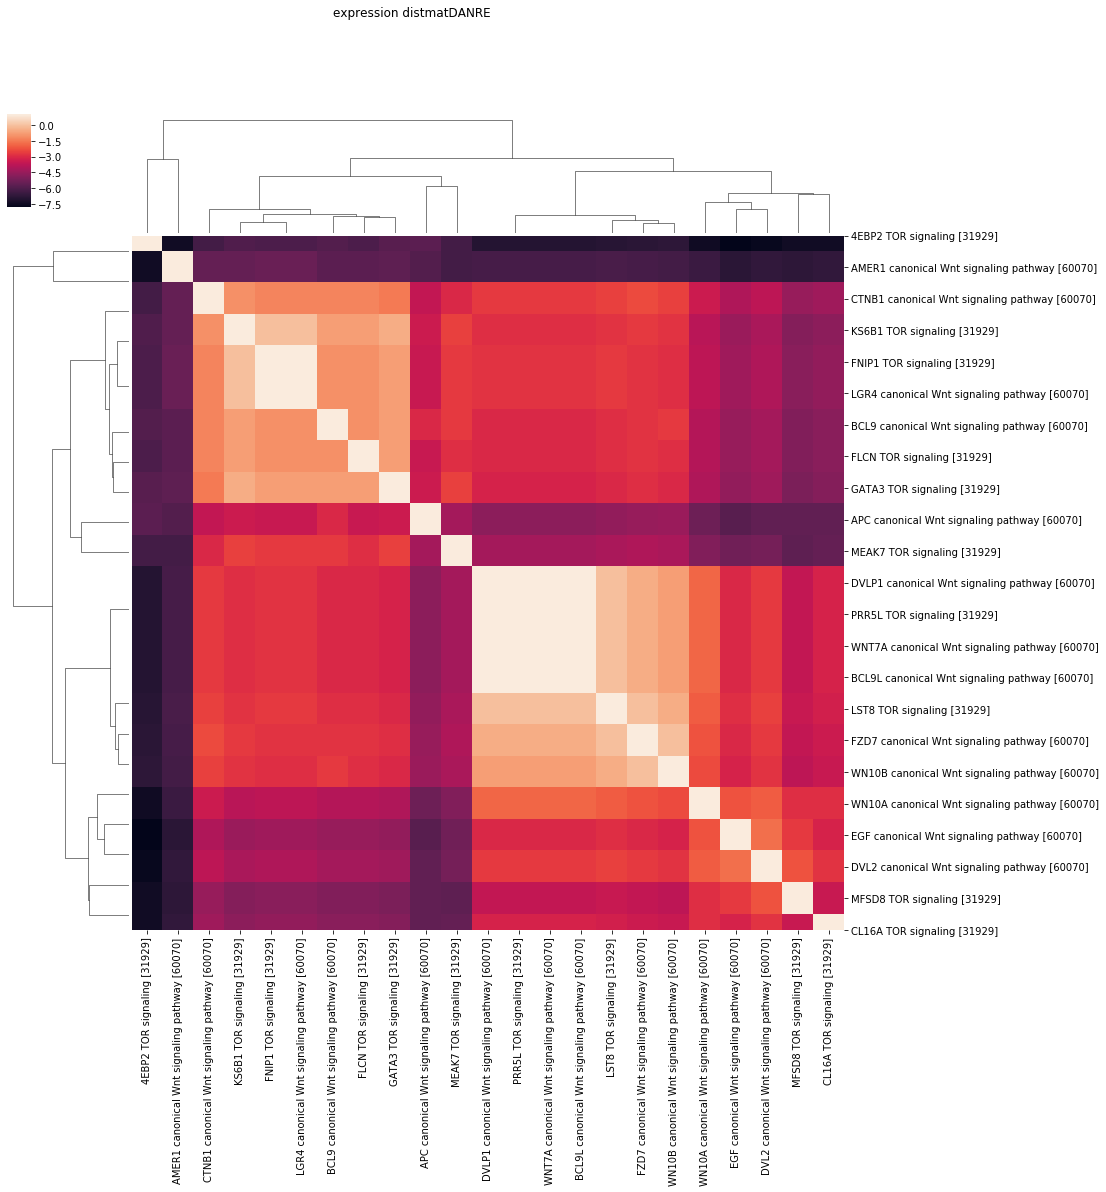

 do our matrices match from one approach to the other? 


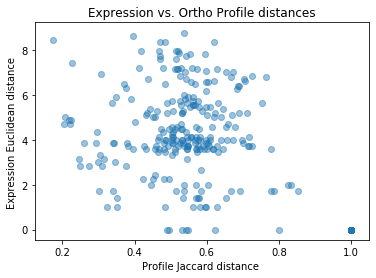

Pearson:(0.2991292925485466, 2.137825758334335e-12)
MOUSE
      anatName                                           anat  \
0        manus  http://purl.obolibrary.org/obo/UBERON_0002398   
1  bone marrow  http://purl.obolibrary.org/obo/UBERON_0002371   
2     pancreas  http://purl.obolibrary.org/obo/UBERON_0001264   
3       retina  http://purl.obolibrary.org/obo/UBERON_0000966   
4       embryo  http://purl.obolibrary.org/obo/UBERON_0000922   

              geneEns species canonicalid  \
0  ENSMUSG00000020091   MOUSE      P70445   
1  ENSMUSG00000020091   MOUSE      P70445   
2  ENSMUSG00000024142   MOUSE      Q9DCJ1   
3  ENSMUSG00000028017   MOUSE      P01132   
4  ENSMUSG00000068663   MOUSE      Q80U30   

                                         names  
0                  4EBP2 TOR signaling [31929]  
1                  4EBP2 TOR signaling [31929]  
2                   LST8 TOR signaling [31929]  
3  EGF canonical Wnt signaling pathway [60070]  
4                  CL16A TOR signal

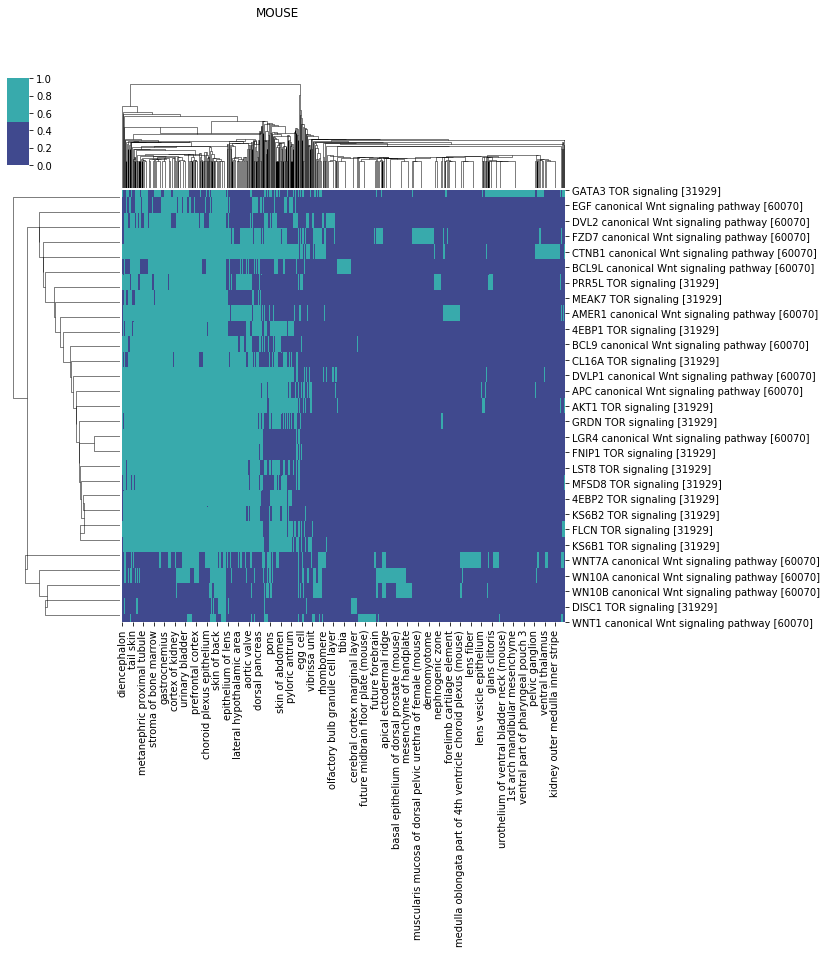

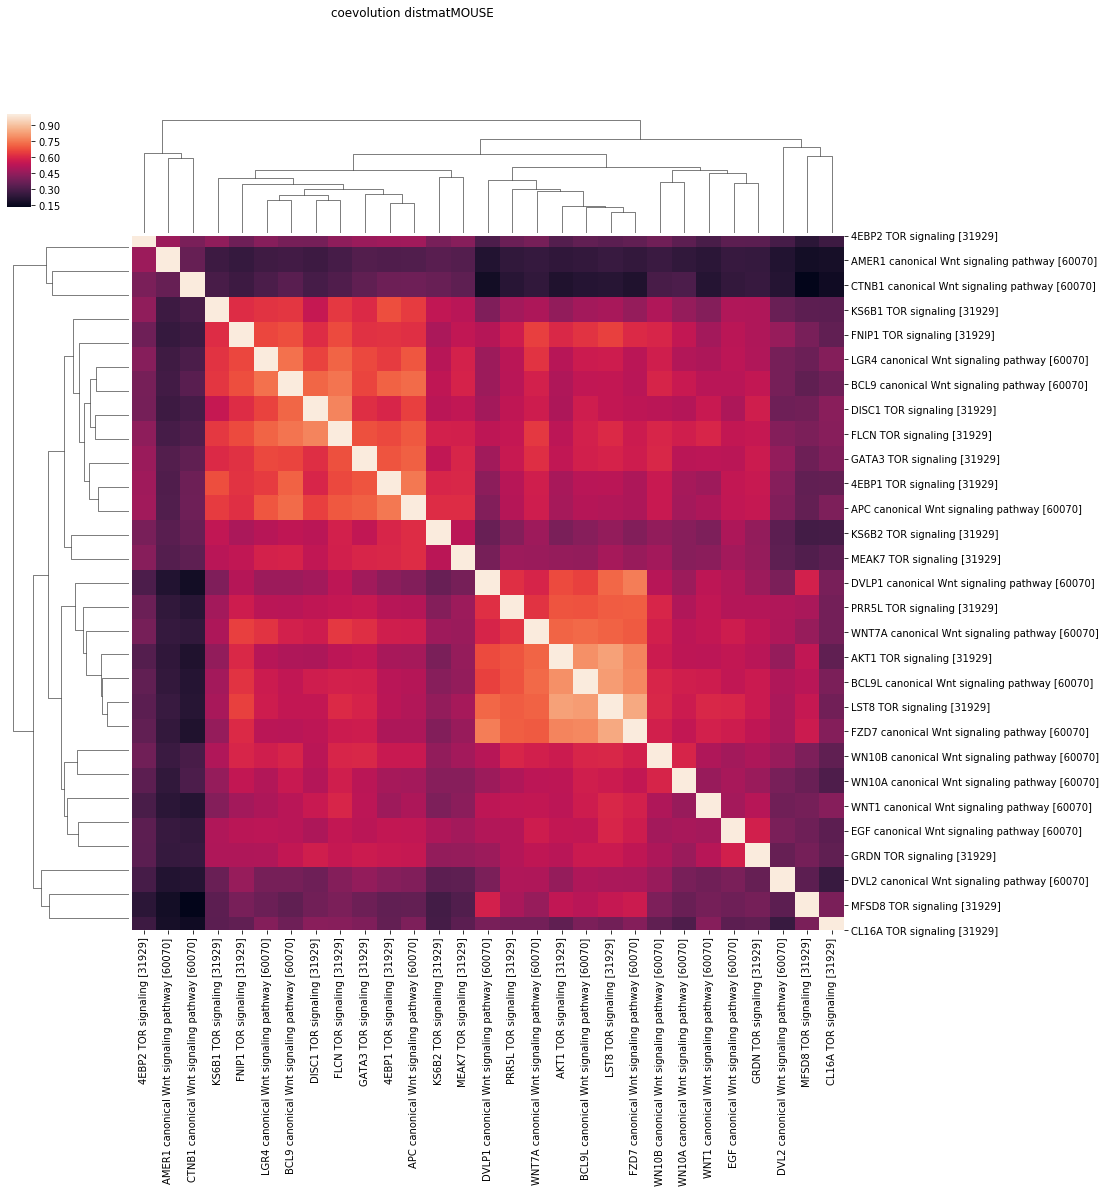

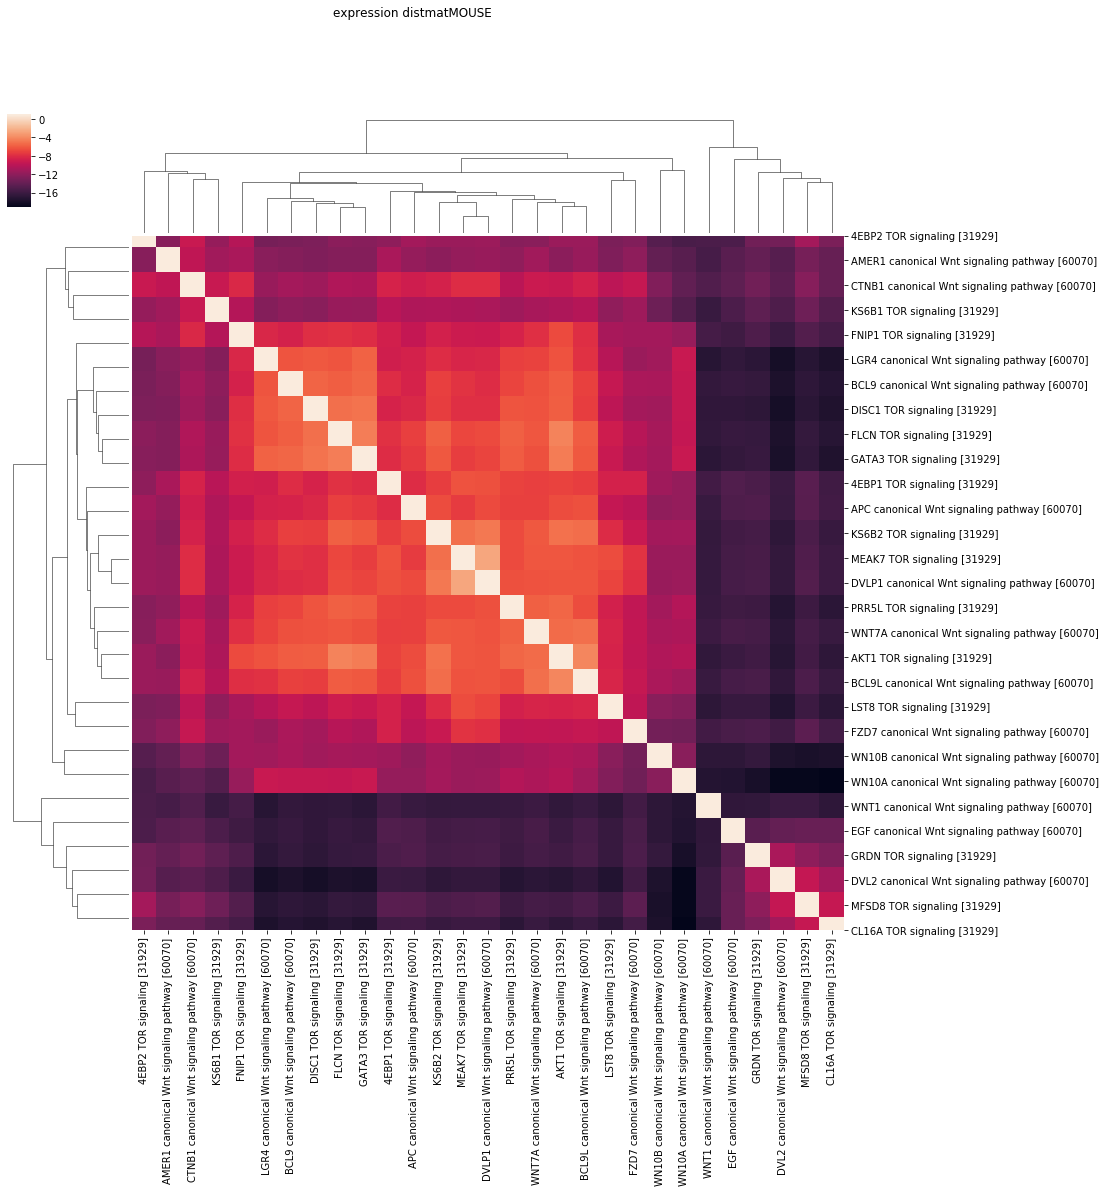

 do our matrices match from one approach to the other? 


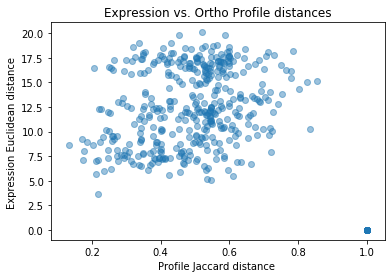

Pearson:(0.1103260583475601, 0.0013530484048478576)
PIGXX
            anatName                                           anat  \
0             kidney  http://purl.obolibrary.org/obo/UBERON_0002113   
1  prefrontal cortex  http://purl.obolibrary.org/obo/UBERON_0000451   
2  prefrontal cortex  http://purl.obolibrary.org/obo/UBERON_0000451   
3  prefrontal cortex  http://purl.obolibrary.org/obo/UBERON_0000451   
4              liver  http://purl.obolibrary.org/obo/UBERON_0002107   

              geneEns species canonicalid  \
0  ENSSSCG00000017670   PIGXX  A0A481C7T7   
1  ENSSSCG00000000182   PIGXX  A0A4X1WDV6   
2  ENSSSCG00000003342   PIGXX  A0A4X1WAB8   
3  ENSSSCG00000015099   PIGXX  A0A287BRW5   
4  ENSSSCG00000011125   PIGXX  A0A4X1T904   

                                           names  
0                    KS6B1 TOR signaling [31929]  
1  WN10B canonical Wnt signaling pathway [60070]  
2  DVLP1 canonical Wnt signaling pathway [60070]  
3  BCL9L canonical Wnt signaling pathway

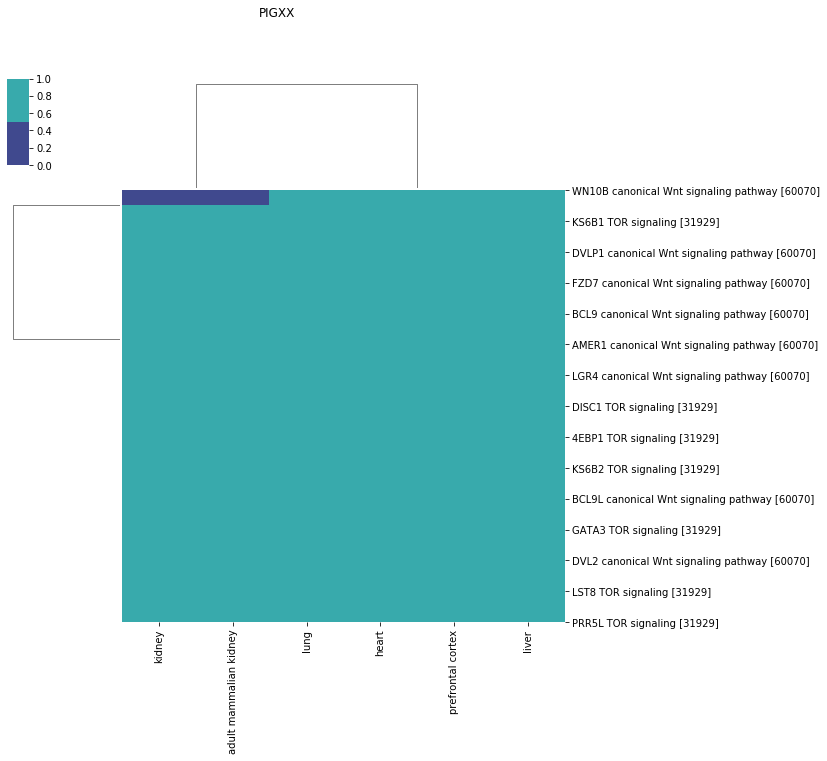

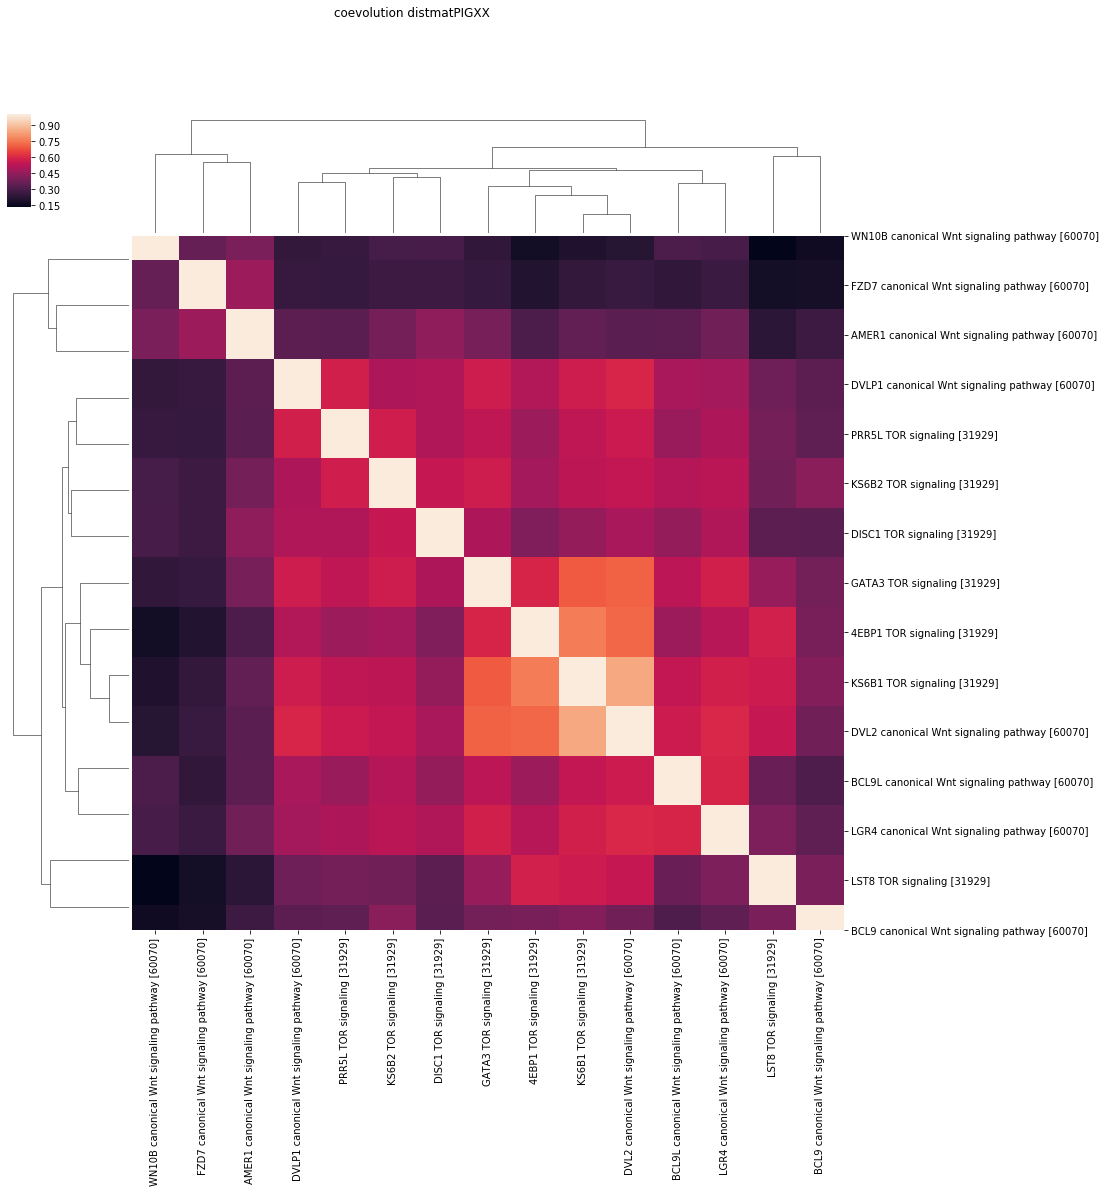

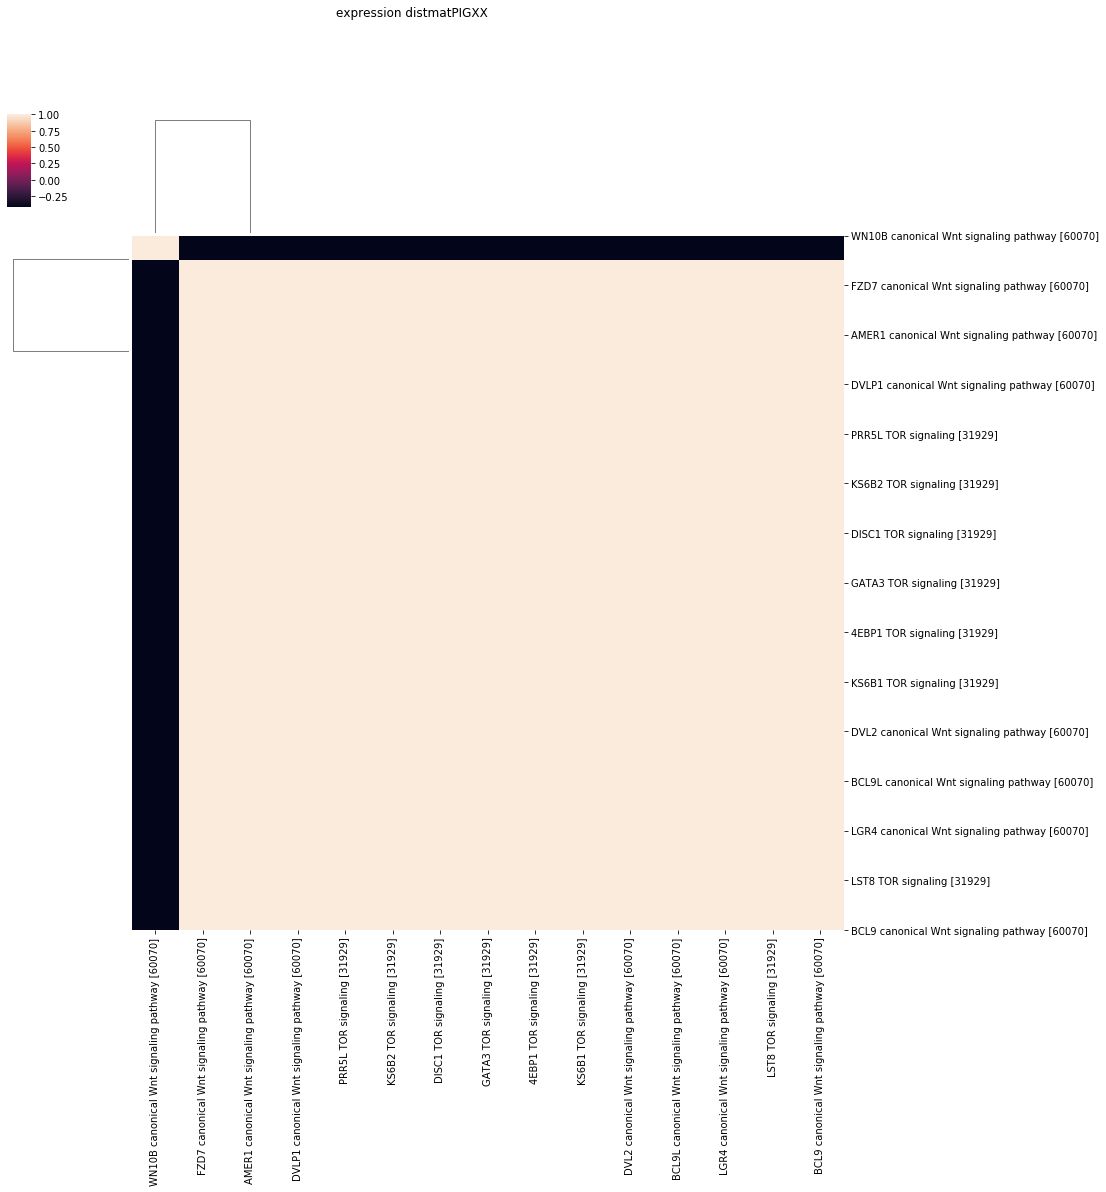

 do our matrices match from one approach to the other? 


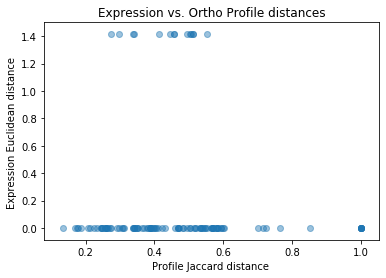

Pearson:(0.0523494339589966, 0.43456501454462587)
FELCA
                 anatName                                           anat  \
0       prefrontal cortex  http://purl.obolibrary.org/obo/UBERON_0000451   
1                   liver  http://purl.obolibrary.org/obo/UBERON_0002107   
2       prefrontal cortex  http://purl.obolibrary.org/obo/UBERON_0000451   
3  adult mammalian kidney  http://purl.obolibrary.org/obo/UBERON_0000082   
4                   liver  http://purl.obolibrary.org/obo/UBERON_0002107   

              geneEns species canonicalid                        names  
0  ENSFCAG00000003395   FELCA      M3W099  KS6B2 TOR signaling [31929]  
1  ENSFCAG00000028983   FELCA  A0A2I2UIE8  PRR5L TOR signaling [31929]  
2  ENSFCAG00000028983   FELCA  A0A2I2UIE8  PRR5L TOR signaling [31929]  
3  ENSFCAG00000010425   FELCA      M3WD87  4EBP1 TOR signaling [31929]  
4  ENSFCAG00000003395   FELCA      M3W099  KS6B2 TOR signaling [31929]  
                                              pre

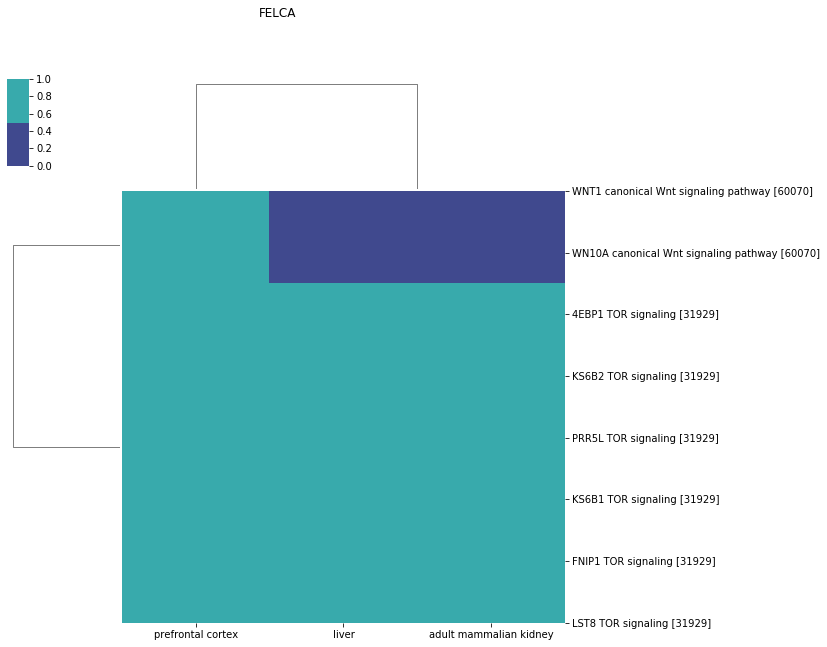

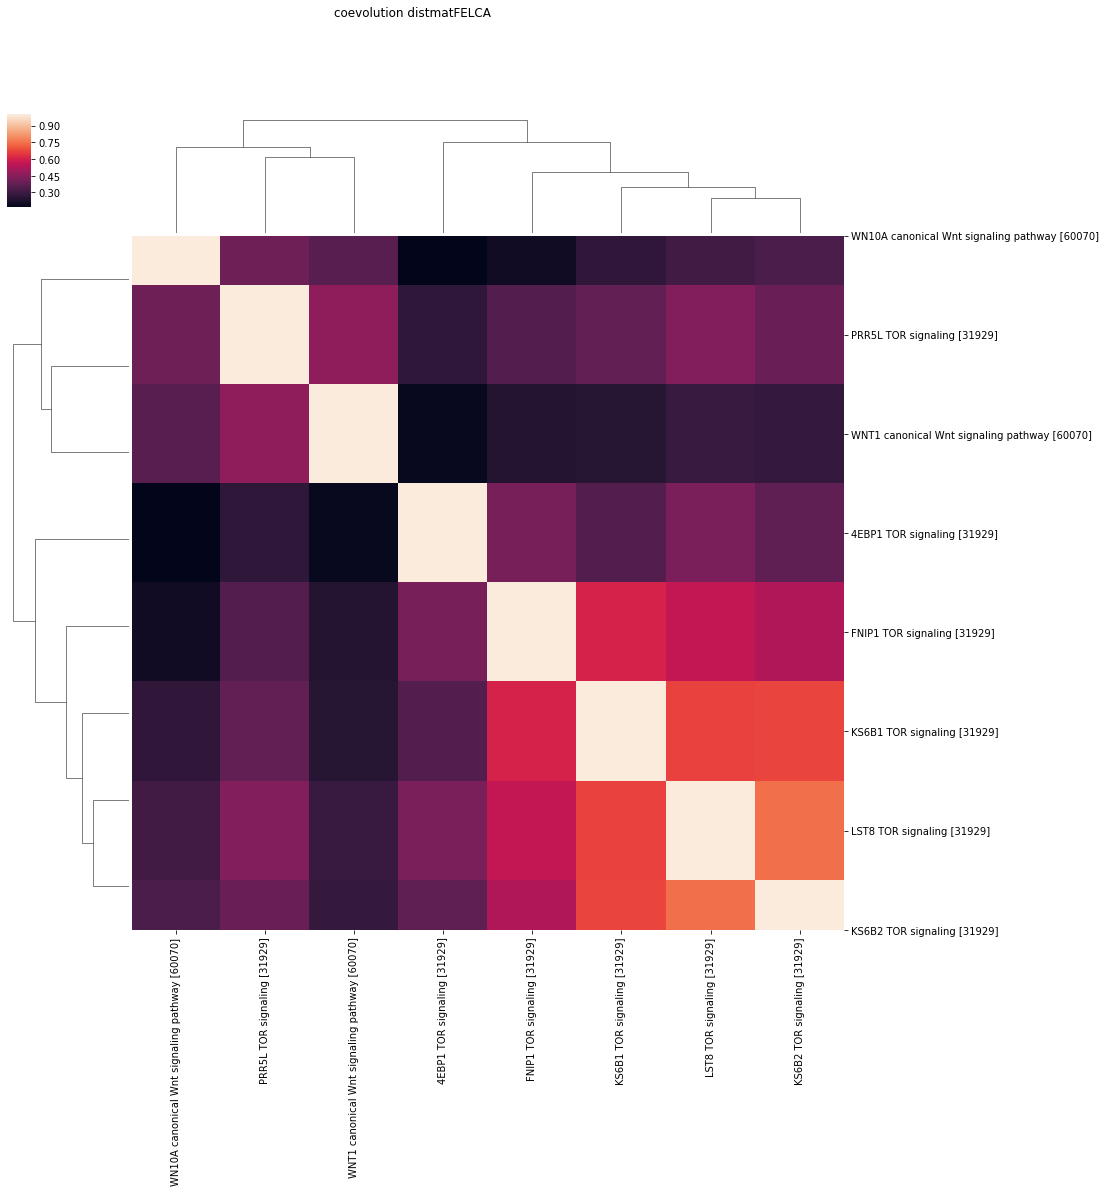

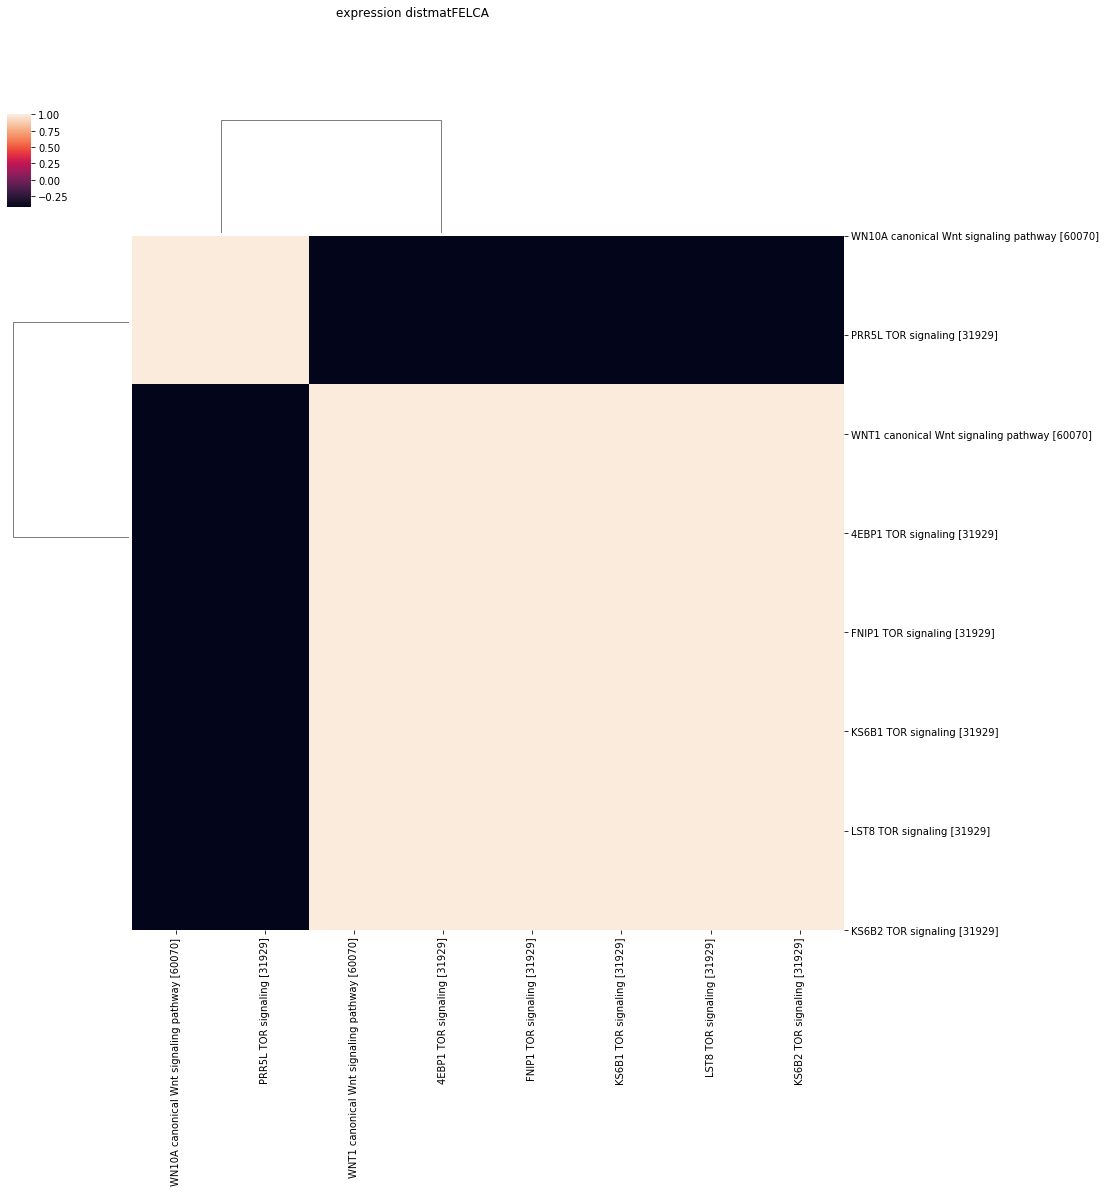

 do our matrices match from one approach to the other? 


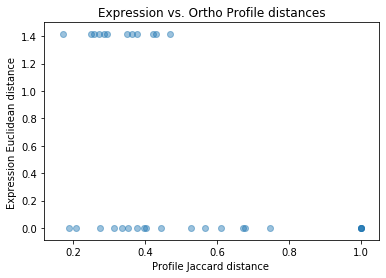

Pearson:(0.4488484256641572, 0.00019920039935161863)


In [19]:
#now for the results of our efforts!
from scipy.stats import pearsonr , spearmanr


for spec in expressionDF.species.unique():
    selected = set()
    #look at the clustering of the expression data for each species
    print(spec)
    sub = expressionDF[expressionDF.species == spec]
    #we can create another dataframe which shows the genes expressed in each tissue
    print(sub.head())
    #each row is a gene
    #each column is a tissue
    #we only consider tissues where at least one of the genes is expressed
    rows = list(sub.names.unique())
    columns = list(sub.anatName.unique())
    expr_mat = {r :{ c : 0 for c in columns  } for r in rows }
    #lets set all of the places where each gene is expressed to 1
    for i,r in sub.iterrows():
        selected.add(r.names)
        expr_mat[r.names][r.anatName] = 1
    #and transform everything into a dataframe
    expr_mat = pd.DataFrame.from_dict( expr_mat , orient='index' )
    #generate a clustered heatmap figure
    #to show similarity in expression patterns across tissues
    g = sns.clustermap( expr_mat , metric= metrics[0] , method=methods[2] , col_cluster=True, row_cluster= True , cmap = sns.color_palette("mako", 2))
    g.fig.suptitle(spec)
    g.savefig( spec+'expcluster.svg')
    plt.show()
    
    #comparing the phylogenetic profile distmat
    sub_orthodf = orthosdf.loc[selected]
    distmat_ortho = cdist(sub_orthodf.to_numpy(), sub_orthodf.to_numpy() , metric = metrics[2])
    g = sns.clustermap( 1-distmat_ortho , metric= metrics[0] , method=methods[1] , rasterized=True, col_cluster=True, row_cluster= True, yticklabels = selected , xticklabels = selected , figsize = (15, 15)  )
    g.fig.suptitle( 'coevolution distmat' + spec) 
    plt.show()
    
    #with the expression profile distmat
    distmat_expr = cdist(expr_mat.to_numpy(), expr_mat.to_numpy() , metric = metrics[0])
    g = sns.clustermap( 1-distmat_expr , metric= metrics[0] , method=methods[1] , col_cluster=True,rasterized=True,  row_cluster= True, yticklabels = selected, xticklabels =selected , figsize = (15, 15) )
    g.fig.suptitle( 'expression distmat' + spec ) 
    plt.show()
    
    #verify if expression and phylogenetic profile distances are correlated.
    print( ' do our matrices match from one approach to the other? ')
    plt.title( 'Expression vs. Ortho Profile distances')
    plt.xlabel( 'Profile Jaccard distance ')
    plt.ylabel( 'Expression Euclidean distance ')
    plt.scatter(1-distmat_ortho.ravel() , distmat_expr.ravel() , alpha= .25)
    plt.show()
    print( 'Pearson:'+ str( pearsonr( 1-distmat_ortho.ravel() , 1-distmat_expr.ravel() )  ) ) 
    